In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/ionosphere.data',header=None)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [ ]:
df[34]=df[34].map({'g':1,'b':0})

In [ ]:
df.shape

(351, 35)

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

<Axes: >

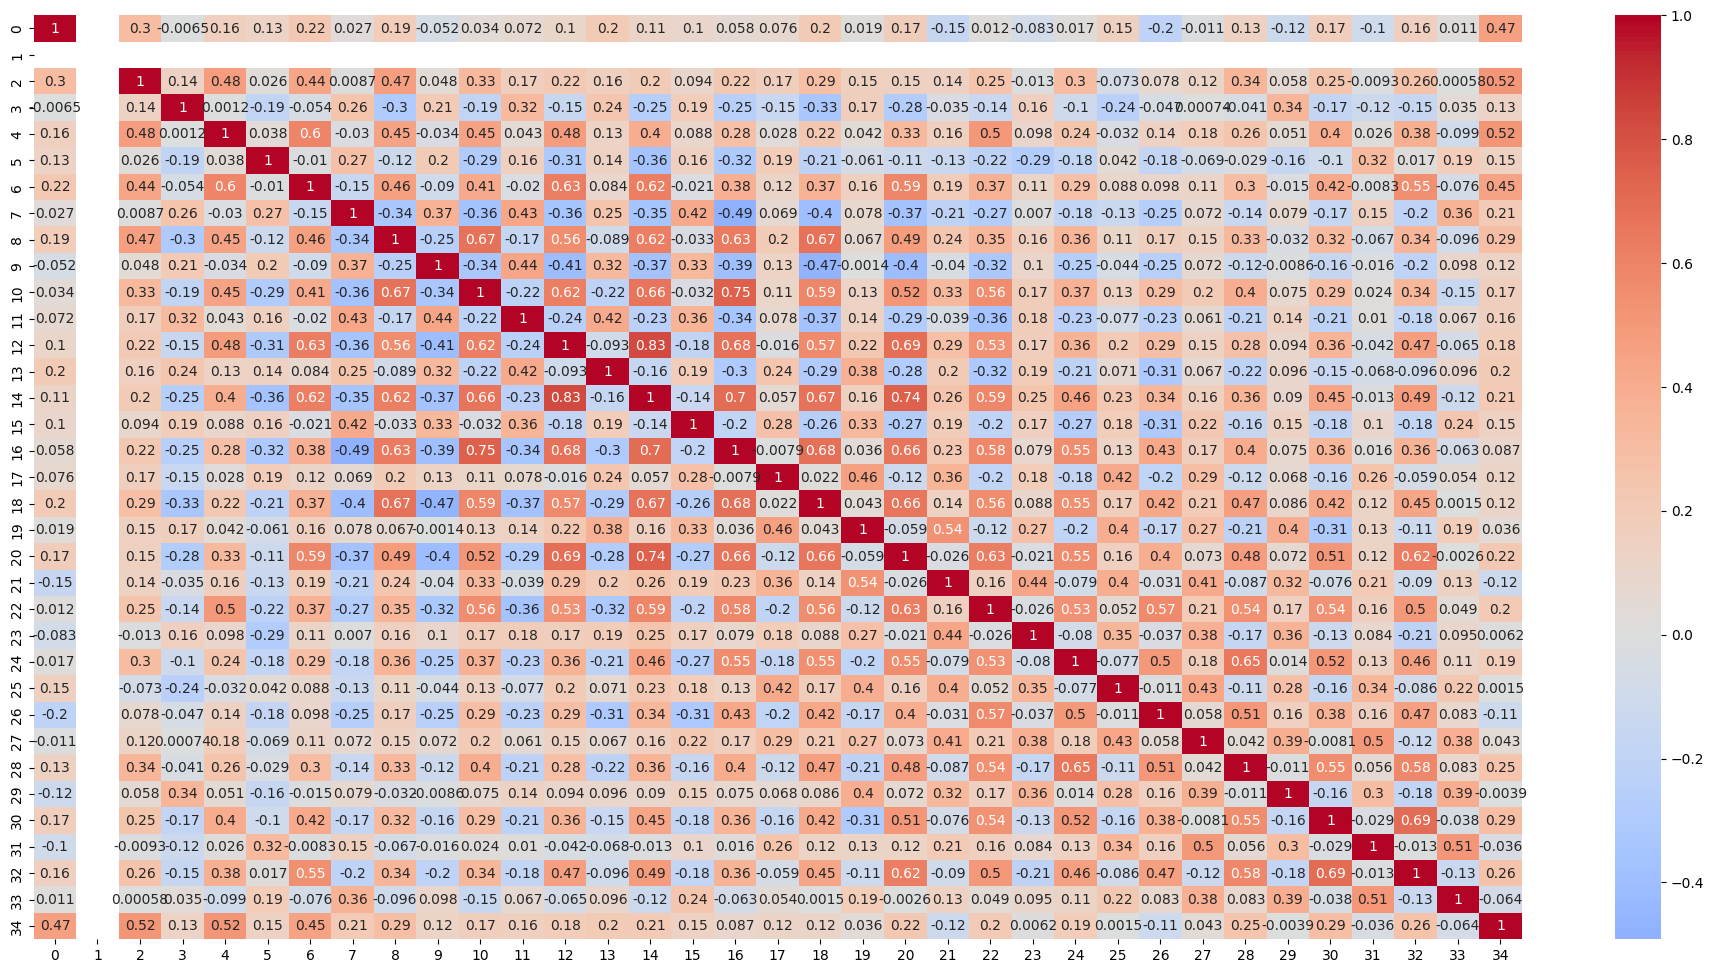

In [ ]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), cmap="coolwarm", center=0,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.175,shuffle=True,random_state=516)

In [ ]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.fit_transform(X_test)

In [ ]:
import torch
from torch.utils.data import TensorDataset,DataLoader
X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32).unsqueeze(dim=1)
y_test=torch.tensor(y_test,dtype=torch.float32).unsqueeze(dim=1)

In [ ]:
training=TensorDataset(X_train,y_train)
testing=TensorDataset(X_test,y_test)

In [ ]:
trainging=DataLoader(training,batch_size=27,shuffle=True)
testing=DataLoader(testing,batch_size=27)

In [ ]:
from torch import nn
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Linear(34,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,32)
    )
    self.layer2=nn.Sequential(
        nn.Linear(32,16),
        nn.ReLU(),
        nn.Linear(16,8),
        nn.ReLU(),
        nn.Linear(8,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.layer2(self.layer1(x))

In [ ]:
model=Model()
model

Model(
  (layer1): Sequential(
    (0): Linear(in_features=34, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=32, bias=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
lossf=nn.BCELoss()
optim=torch.optim.Adam(model.parameters(),lr=1e-4)
sch=torch.optim.lr_scheduler.StepLR(optim,step_size=10,gamma=0.15)

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(34343)

epochs=25
lambda_l1 = 0.0001
for epoch in tqdm(range(epochs)):
    model.train()
    training_loss=0
    for i,(X,y) in enumerate(training):
        preds=model(X)
        loss=lossf(preds,y)
        l1_penalty = 0
        for param in model.parameters():
          l1_penalty += torch.sum(torch.abs(param))
        loss+=lambda_l1*l1_penalty
        training_loss+=loss.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
    sch.step()
    training_loss /= len(training)
    model.eval()
    test_loss=0
    with torch.inference_mode():
      for X,y in testing:
        test_pred=model(X)
        loss=lossf(test_pred,y)
        test_loss+=loss.item()
      test_loss /= len(testing)

    if epoch % 2 == 0:
        print(f"Epoch {epoch:02d} | Train Loss: {training_loss:.4f} | Test Loss: {test_loss:.4f}")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 00 | Train Loss: 0.7585 | Test Loss: 0.6779
Epoch 02 | Train Loss: 0.6868 | Test Loss: 0.5922
Epoch 04 | Train Loss: 0.3798 | Test Loss: 0.2777
Epoch 06 | Train Loss: 0.2458 | Test Loss: 0.1881
Epoch 08 | Train Loss: 0.1977 | Test Loss: 0.1647
Epoch 10 | Train Loss: 0.1714 | Test Loss: 0.1606
Epoch 12 | Train Loss: 0.1678 | Test Loss: 0.1605
Epoch 14 | Train Loss: 0.1644 | Test Loss: 0.1604
Epoch 16 | Train Loss: 0.1613 | Test Loss: 0.1598
Epoch 18 | Train Loss: 0.1583 | Test Loss: 0.1591
Epoch 20 | Train Loss: 0.1551 | Test Loss: 0.1588
Epoch 22 | Train Loss: 0.1547 | Test Loss: 0.1587
Epoch 24 | Train Loss: 0.1543 | Test Loss: 0.1587


In [ ]:
from sklearn.metrics import classification_report

model.eval()
y_true_list = []
y_pred_list = []

with torch.inference_mode():
    for X, y in training:
        preds = model(X)
        preds_labels = (preds > 0.5).int()
        y_true_list.append(y)
        y_pred_list.append(preds_labels)

y_true = torch.cat(y_true_list).numpy()
y_pred = torch.cat(y_pred_list).numpy()

cm = classification_report(y_true, y_pred)
print("Classification Repot:\n", cm)

Classification Repot:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       100
         1.0       0.98      0.99      0.99       189

    accuracy                           0.98       289
   macro avg       0.98      0.98      0.98       289
weighted avg       0.98      0.98      0.98       289

